In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
% matplotlib inline

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%tensorflow_version 2.x

In [20]:
import tensorflow
print(tensorflow.__version__)

2.0.0


In [21]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
#importing all the necessary packages
#tensorflow 2.0
from tensorflow.keras import datasets, layers, models

In [55]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 6s 0us/step


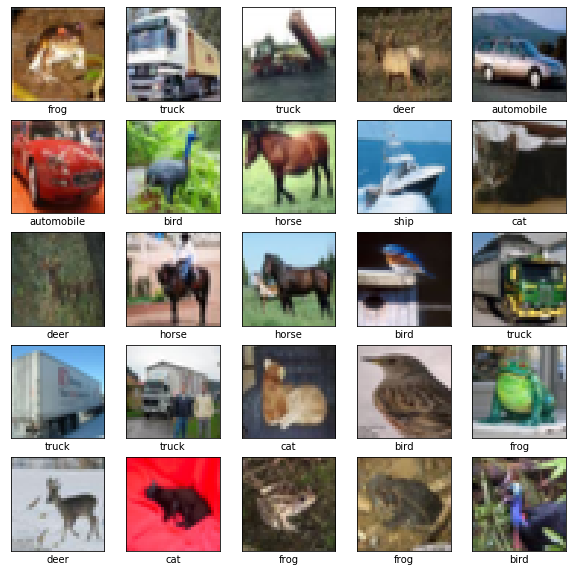

In [56]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(96, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 96)          55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 96)          0         
Total params: 74,784
Trainable params: 74,784
Non-trainable params: 0
____________________________________________________

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 96)          55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 96)          0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#Image data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True)

# train the model
start = time.time()
# fits the model on batches with real-time data augmentation:
history=model.fit_generator(datagen.flow(train_images, train_labels, batch_size=128),
                    steps_per_epoch=1000, epochs=100,validation_data=(test_images, test_labels))

end = time.time()
print("Model took %0.2f seconds to train"%(end - start))

Epoch 1/100
1000/1000 [==============================] - 118s 118ms/step - loss: 1.6640 - accuracy: 0.3672 - val_loss: 1.3343 - val_accuracy: 0.5096
Epoch 2/100
1000/1000 [==============================] - 118s 118ms/step - loss: 1.3710 - accuracy: 0.5182 - val_loss: 1.1222 - val_accuracy: 0.6064
Epoch 3/100
1000/1000 [==============================] - 119s 119ms/step - loss: 1.2249 - accuracy: 0.5828 - val_loss: 1.0808 - val_accuracy: 0.6232
Epoch 4/100
1000/1000 [==============================] - 119s 119ms/step - loss: 1.1436 - accuracy: 0.6160 - val_loss: 1.0248 - val_accuracy: 0.6432
Epoch 5/100
1000/1000 [==============================] - 118s 118ms/step - loss: 1.0811 - accuracy: 0.6424 - val_loss: 0.9621 - val_accuracy: 0.6735
Epoch 6/100
1000/1000 [==============================] - 119s 119ms/step - loss: 1.0298 - accuracy: 0.6595 - val_loss: 0.9203 - val_accuracy: 0.6834
Epoch 7/100
1000/1000 [==============================] - 119s 119ms/step - loss: 0.9927 - accuracy: 0.6729

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model.save('model_CNN.h5')
model_file = drive.CreateFile({'CNN_model' : 'model_CNN.h5'})
model_file.SetContentFile('model_CNN.h5')                      
model_file.Upload()

In [0]:
  # always save your weights after training or during training
model.save_weights('C:/Users/RohithRamesh/Desktop/CC Configuration/CNN_100_epochs')

In [0]:
from tensorflow.keras.models import load_model


10000/1 - 1s - loss: 0.5685 - accuracy: 0.7708


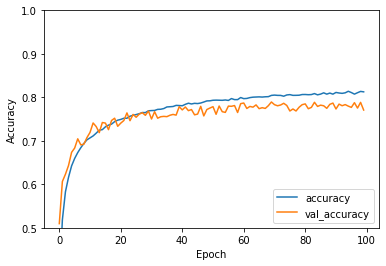

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [0]:
load_model = tf.keras.models.load_model('drive/My Drive/model_CNN.h5')

In [23]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 96)          55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 96)          0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0

**Testing with an image**

In [0]:
img_test = tf.keras.preprocessing.image.load_img('drive/My Drive/DATA files/CNN model weights/Horse_image.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest'
)


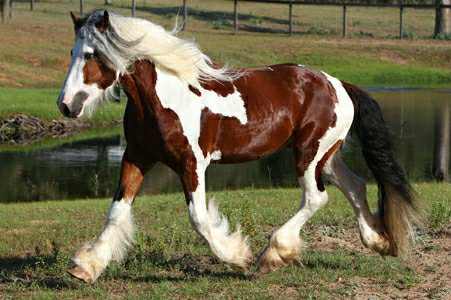

In [28]:
img_test

In [0]:
img_test1 = np.array(img_test)

In [32]:
img_test1.shape

(300, 451, 3)

In [0]:
img_test2 = tf.keras.preprocessing.image.load_img('drive/My Drive/DATA files/CNN model weights/Horse_image.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=(32,32))


In [78]:
img = np.array(img_test2)
img.shape

(32, 32, 3)

In [0]:
img = img / 255.0

**reshape into a single sample with 3 channels**

In [0]:
img = img.reshape(1, 32, 32, 3)

**predict the class**

In [0]:
predictions = load_model.predict_classes(img)

In [82]:
predictions

array([7])

In [0]:
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [84]:
result = np.argmax(load_model.predict(img))
print(result)

7


In [85]:
labels[result]

'horse'

**Test Image 2**

In [0]:
image_test= tf.keras.preprocessing.image.load_img('drive/My Drive/DATA files/CNN model weights/Deer.jpg', grayscale=False,
    color_mode='rgb')

In [0]:
img_test3 = tf.keras.preprocessing.image.load_img('drive/My Drive/DATA files/CNN model weights/Deer.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=(32,32))
img1 = np.array(img_test3)
img1.shape
img1 = img1 / 255.0
img1 = img1.reshape(1, 32, 32, 3)

In [76]:
result1 = np.argmax(load_model.predict(img1))
print(labels[result1])

deer


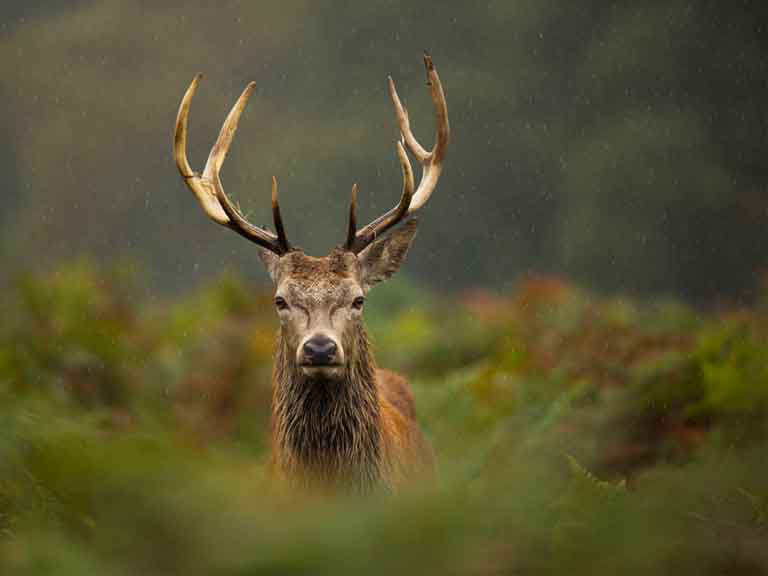

In [96]:
image_test

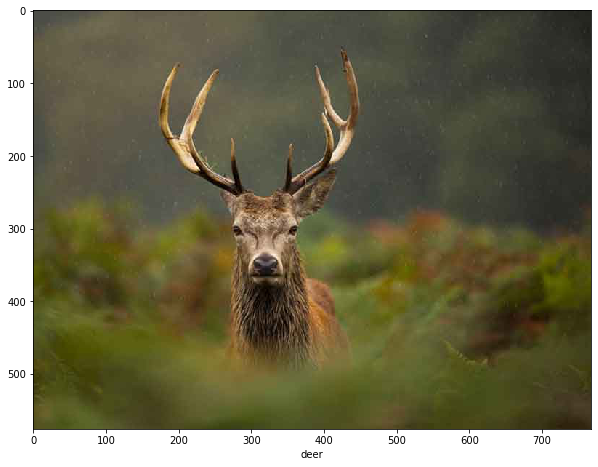

In [105]:
plt.figure(figsize=(10,10))
plt.imshow(image_test)
plt.xlabel(labels[result1])
plt.show()